<a href="https://colab.research.google.com/github/Shilpa-Chaman/Shilpa-Chaman/blob/Shilpa-Chaman-Tensor-Flow/Boston_Housing_Prices_Normalised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load tensorFlow

In [ ]:
import tensorflow
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
print(tensorflow.__version__)
import numpy as np

In [ ]:
#Reset Default graph - Needed only for Jupyter notebook
#anytime we wnt to change the graph
tf.reset_default_graph()

### Collect Data

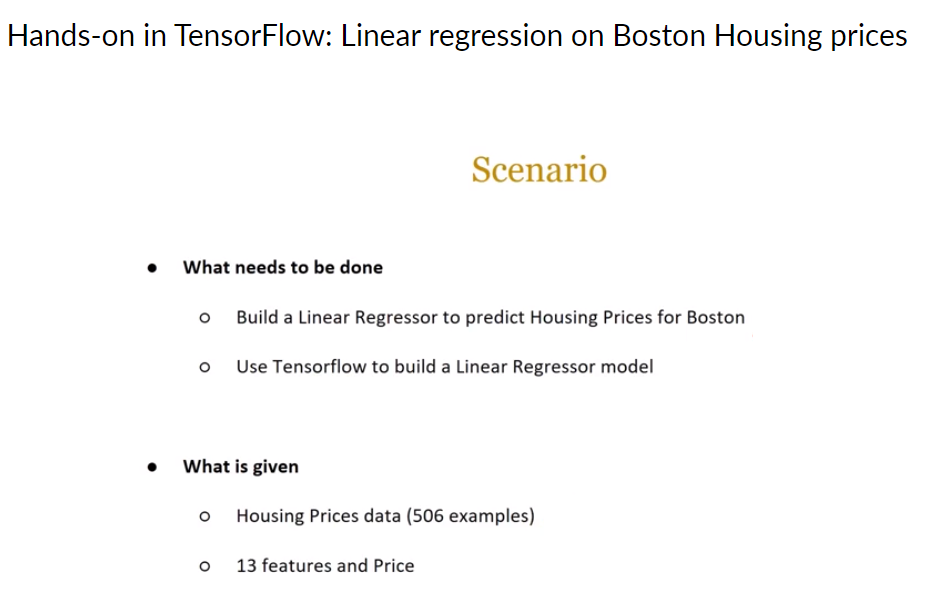

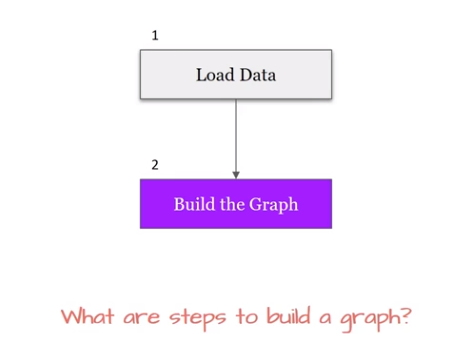

In [ ]:
from tensorflow.python.keras.datasets import boston_housing

#Load data
(features, actual_prices),_ = boston_housing.load_data(test_split=0)

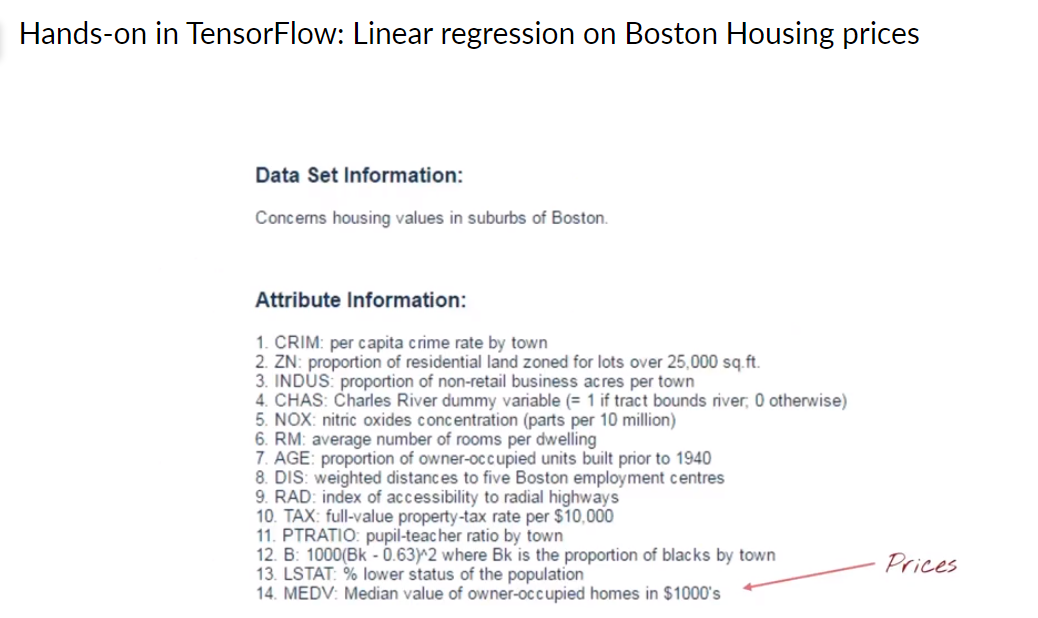

In [ ]:
print('Number of examples: ', features.shape[0])
print('Number of features for each example: ', features.shape[1])
print('Shape of actual prices data: ', actual_prices.shape)

# Building the graph

Define input data placeholders

In [ ]:
#even if we dont provide actual data , we still provide a shape
#none means it can have any number of rows and each example has 13 columns.
x = tf.placeholder(shape=[None,13],dtype=tf.float32, name='x-input')
#Normalize the data
x_n=tf.layers.batch_normalization(x,training=True)
#Actual Prices
#none means it can have any number of rows and one output.
y_ = tf.placeholder(shape=[None],dtype=tf.float32, name='y-input')

Define Weights and Bias

In [ ]:
#we have to create weights and bias using variables
# since their value may change during the course, but we initialize them with zeros
# we will have 13 weights
# their will be one bias= no of o/p we need
W = tf.Variable(tf.zeros(shape=[13,1]), name="Weights")
b = tf.Variable(tf.zeros(shape=[1]), name="Bias")

Prediction

In [ ]:
#matrix multiplication of W and x and then add b(bias)
y = tf.add(tf.matmul(x_n,W),b,name='output')

Loss (Cost) Function

In [ ]:
#mean square error : we find the squared difference b/w actual and predicted value
# then we find the mean
loss = tf.reduce_mean(tf.square(y-y_),name='Loss')

GradientDescent Optimizer to minimize Loss

In [ ]:
# we get gradient descent optimizer by tensor flow library
# we pass the learning rate and we try to minimize the MSE loss
train_op = tf.train.GradientDescentOptimizer(0.03).minimize(loss)

# Executing the Graph

In [ ]:
#Lets start graph Execution
# we start a session
sess = tf.Session()

# variables need to be initialized before we can use them b y using the following command
sess.run(tf.global_variables_initializer())

#how many times data need to be shown to model
training_epochs = 100

In [ ]:
for epoch in range(training_epochs):
            
    #Calculate train_op and loss
    _, train_loss = sess.run([train_op,loss],feed_dict={x:features, y_:actual_prices})
    
    if epoch % 10 == 0:
        print ('Training loss at step: ', epoch, ' is ', train_loss)

In [ ]:

#nan came becuse we need to normalize the data
features[0]

In [ ]:
writer=tf.summary.FileWriter("./logs/new",sess.graph)
%load_ext tensorboard
%tensorboard--logdir=logs
sess.close()